# Predicting House Prices (Regression Modelling)

The purpose of this project is to self-teach myself the fundamentals of data science. As such, I will be including summaries of concepts along with the code. The data has been downloaded from "Housing Prices Dataset" (M., Yasser H., https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data). The layout of this project will be following a generic data science pipeline:
1. Understanding the Business Problem - With no business problem, my general goal is to predict house prices well.
2. Data Mining - The data is downloaded from the link above, so this is not necessary.
3. Data Cleaning
4. Data Exploration/ Exploratory Data Analysis
5. Feature Engineering
6. Modelling
7. Visualisation

Since this is my first project of the sort, I will be drawing inspiration from other Kaggle users' projects using this dataset to familiarise myself with concepts, processes, etc. The notebooks I drew from are listed below.

### Acknowledgements
1. Sahitya Setu (https://www.kaggle.com/code/sahityasetu/house-pricing-regression)
2. M Yasser H (https://www.kaggle.com/code/yasserh/housing-price-prediction-best-ml-algorithms#notebook-container)

In [1]:
import os
import time
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import seaborn as sns
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")


## 1. Data Cleaning

In [2]:
start_time = time.time()

os.chdir("C:/Users/benny/Documents/Data Science/Predict House Prices")
data = pd.read_csv("housing.csv")

# Check for duplicate entries
display(data.loc[data.duplicated()])

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [3]:
# Check for empty values
display(data.isna().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## 2. Data Exploration/ Exploratory Data Analysis

In [4]:
# Load data
os.chdir("C:/Users/benny/Documents/Data Science/Predict House Prices")
data = pd.read_csv("housing.csv")

# Explore features, value ranges, data types, etc.
display(data.head())
display(data.describe())
display(data.info())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

There are a mix of numerical and categorical variables in the dataset. Since there is a large range of values between independent variables, feature scaling will be necessary later to normalise the features and ensure they equally contribute to the training process. As for the categorical variables, they will need to be one-hot/dummy encoded.

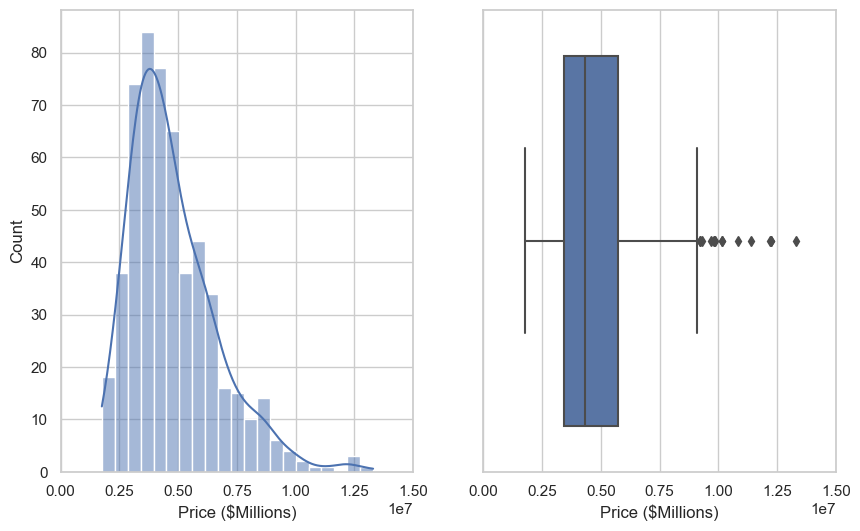

In [5]:
# Begin with a histogram to visualise the distribution of the target variable (price) and a box plot to find outliers
plt.subplot(1,2,1)
sns.histplot(data.price, kde = True)
plt.xlabel("Price ($Millions)")
plt.xlim(0, 1.5e7)

plt.subplot(1,2,2)
plt.xlim(0, 1.5e7)
sns.boxplot(data.price, orient = "h")
plt.gca().set_yticklabels([])
plt.xlabel("Price ($Millions)")
plt.show()


The price histogram shows a right-skewed distribution, also evidenced by the box above showing the mean is larger than the median.

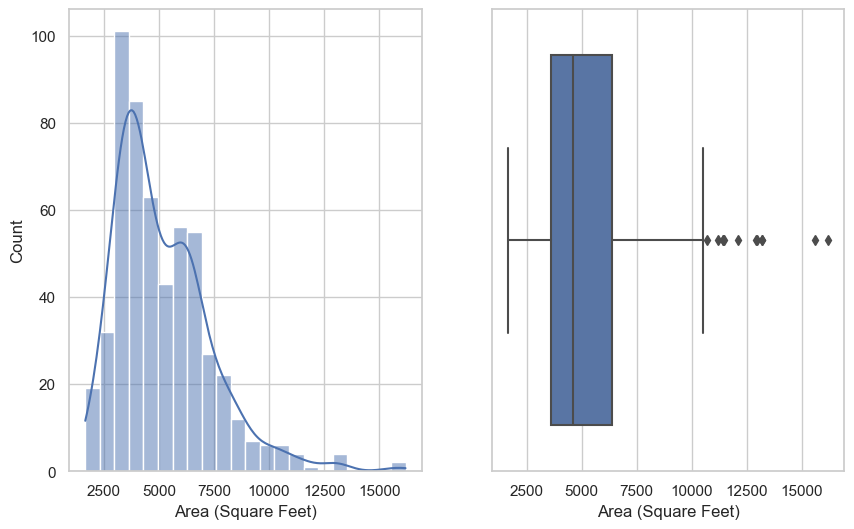

In [6]:
# Check distribution of other continuous numerical feature
plt.subplot(1,2,1)
sns.histplot(data.area, kde = True)
plt.xlabel("Area (Square Feet)")

plt.subplot(1,2,2)
sns.boxplot(data.area, orient = "h")
plt.gca().set_yticklabels([])
plt.xlabel("Area (Square Feet)")
plt.show()

The distribution of house area shows a local maxima around 6000sqft, possibly indicating a subgroup of houses (luxury homes, e.g.). 

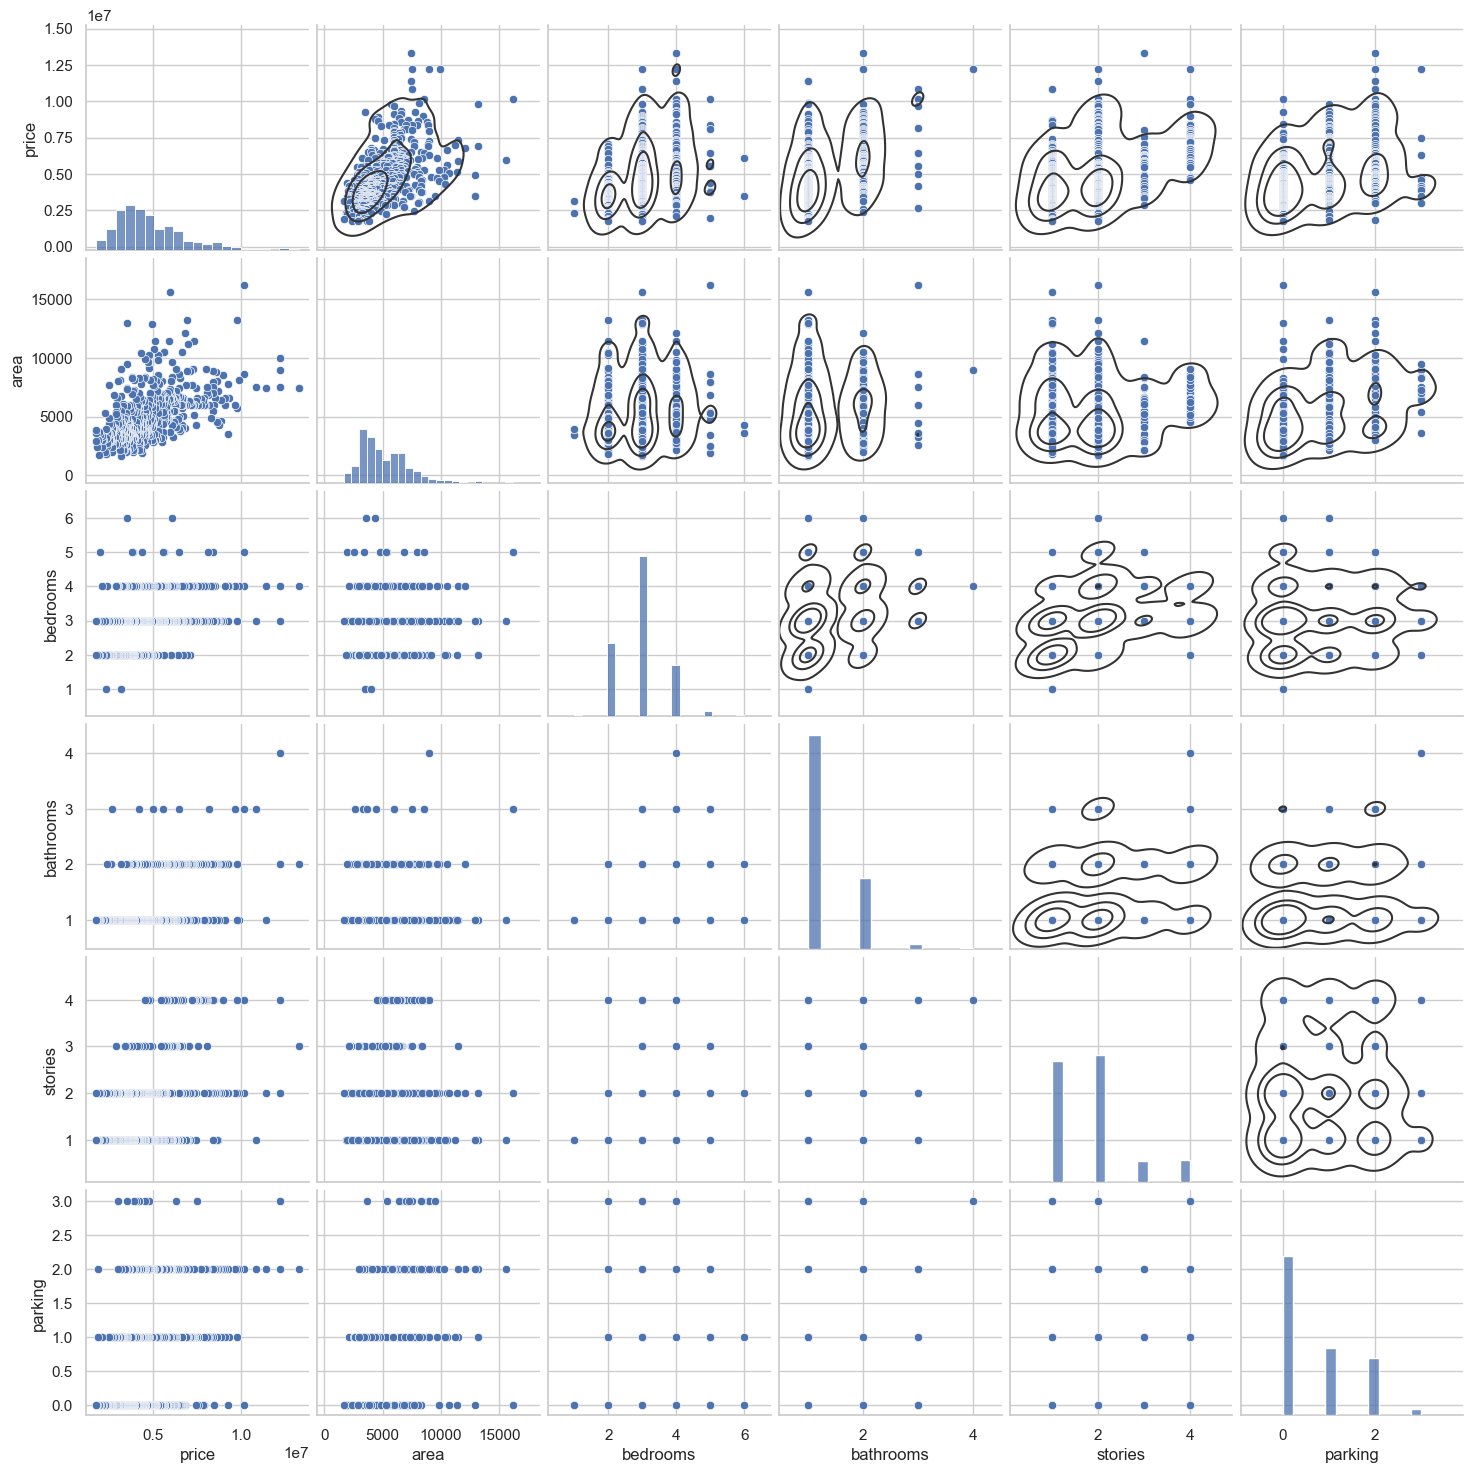

In [7]:
num_vars = [x for x in data.columns if data[x].dtype in ['float64', 'int64']]
p = sns.pairplot(data[num_vars])
p.map_upper(sns.kdeplot, levels=4, color=".2", warn_singular=False)
plt.show()

There seems to be some multicollinearity between the independent variables (such as area and bedrooms). This will be addressed in the feature engineering section.

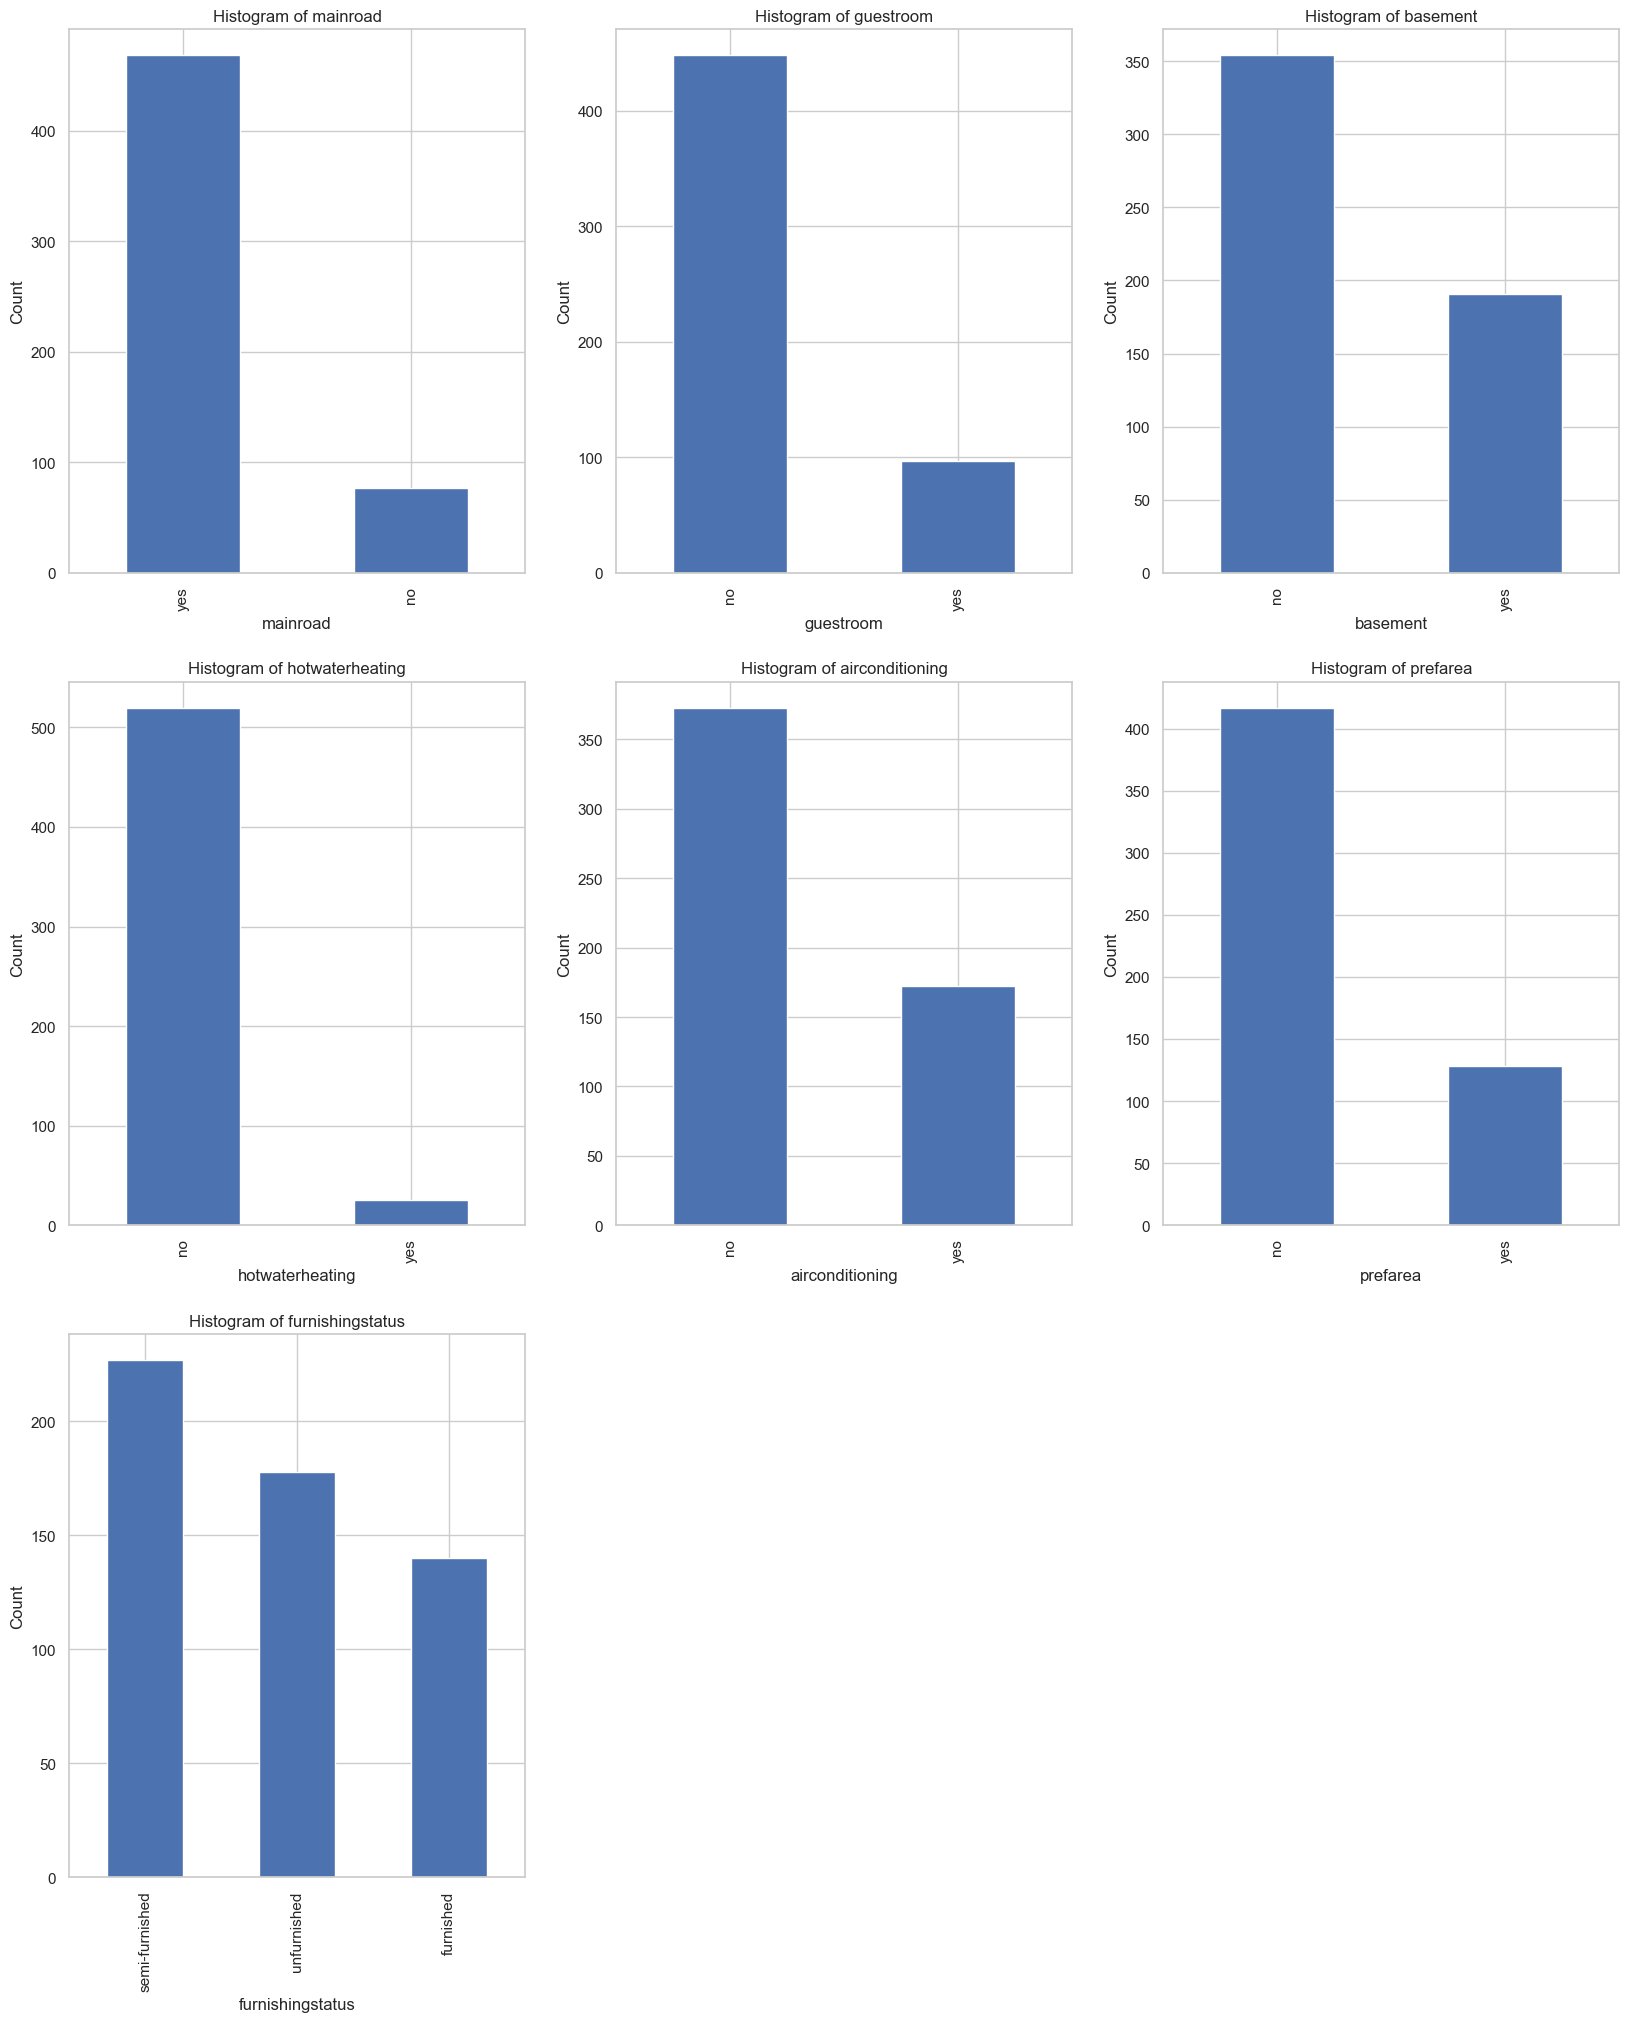

In [8]:
cat_vars = [x for x in data.columns if data[x].dtype in ['object']]
plt.figure(figsize = (20,24))
for i in range(len(cat_vars)):
    plt.subplot(3,3,i+1)
    plt1 = data[cat_vars[i]].value_counts().plot(kind='bar')
    plt1.set(title = f"Histogram of {cat_vars[i]}", xlabel = cat_vars[i], ylabel = "Count")


## 3. Feature Engineering

In [9]:
for i in cat_vars:
    temp = pd.get_dummies(data[i], drop_first = True, prefix = str(i))
    data = pd.concat([data, temp], axis = 1)
    data.drop([i], axis = 1, inplace = True)

display(data)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


For the categorical variables, I dummy encoded them and dropped dropped the first category to reduce multicollinearity.

In [10]:
data1 = data.copy()
for i in ["price", "area"]:
    q1 = data1[i].quantile(0.25)
    q3 = data1[i].quantile(0.75)
    iqr = q3 - q1
    data1 = data1[data1[i] <= q3+(1.5*iqr)]
    data1 = data1[data1[i] >= q1-(1.5*iqr)]
display(data1.describe())

print(f"Outliers removed: {data.shape[0] - data1.shape[0]} ({(data.shape[0] - data1.shape[0])/data.shape[0] * 100:.2f}% of original datset)")

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.170000e+02,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.568873e+06,4890.108317,2.941973,1.261122,1.794971,0.653772,0.851064,0.177950,0.346228,0.042553,0.307544,0.216634,0.415861,0.338491
std,1.594826e+06,1779.173101,0.731701,0.465368,0.865205,0.843380,0.356370,0.382841,0.476228,0.202043,0.461923,0.412350,0.493347,0.473655
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.395000e+06,3520.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.235000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.530000e+06,6050.000000,3.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,9.100000e+06,10360.000000,6.000000,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Outliers removed: 28 (5.14% of original datset)


I removed price and area outliers since they are more prone to extreme values while the other numerical variables will be fairly consistent (the largest number of bedrooms, for example, was 6). I removed these based on the interquartile range since the area distribution is skewed. If the distribution was Gaussian, I should use standard deviation or z-score to remove outliers.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x = data1.drop(["price"], axis = 1)
y = data1["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)
print(f"Original Dataset Size: {data1.shape}\nTraining Dataset Size: {x_train.shape}\nTesting Dataset Size: {x_test.shape}")
display()

#num_vars = [x for x in data.columns if data[x].dtype in ['float64', 'int64'] and x != 'price']
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train) 
scaled_x_test = scaler.transform(x_test)

x_train = pd.DataFrame(scaled_x_train, columns = x.columns)
x_test = pd.DataFrame(scaled_x_test, columns = x.columns)

Original Dataset Size: (517, 14)
Training Dataset Size: (413, 13)
Testing Dataset Size: (104, 13)


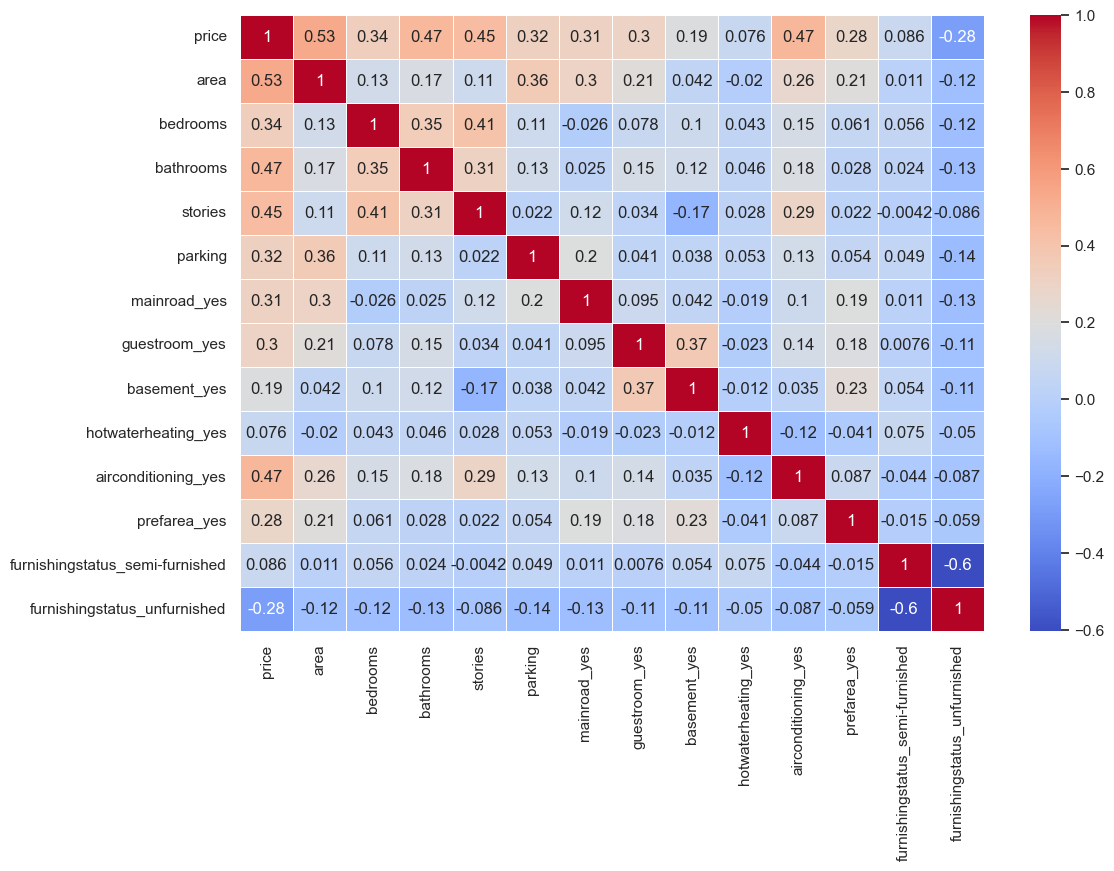

In [12]:
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


From the correlation heatmap, we can see certain variables are fairly strongly correlated (such as number of bedrooms and stories, guestroom and basement, and, obviously, semi-furnished and unfurnished). These will be automatically removed below.

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

selector = RFE(estimator = LinearRegression(), n_features_to_select = 10)
selector = selector.fit(x_train, y_train)
display(list(zip(x_train, selector.ranking_, selector.support_)))

elim_feats = x_train.columns.values[np.logical_not(selector.support_)]
x_train = x_train.drop(columns = elim_feats)
x_test = x_test.drop(columns = elim_feats)
display(x_test.head())



[('area', 1, True),
 ('bedrooms', 3, False),
 ('bathrooms', 1, True),
 ('stories', 1, True),
 ('parking', 1, True),
 ('mainroad_yes', 1, True),
 ('guestroom_yes', 2, False),
 ('basement_yes', 1, True),
 ('hotwaterheating_yes', 1, True),
 ('airconditioning_yes', 1, True),
 ('prefarea_yes', 1, True),
 ('furnishingstatus_semi-furnished', 4, False),
 ('furnishingstatus_unfurnished', 1, True)]

,area,bathrooms,stories,parking,mainroad_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,-0.586384,-0.572043,0.195590,0.398703,0.408248,-0.743392,-0.219598,-0.673962,1.935750,-0.716115
1,-1.023552,-0.572043,-0.958392,-0.777472,0.408248,1.345185,-0.219598,-0.673962,-0.516596,1.396424
2,-0.329912,-0.572043,-0.958392,1.574879,0.408248,-0.743392,-0.219598,1.483762,-0.516596,-0.716115
3,1.984165,-0.572043,-0.958392,-0.777472,0.408248,-0.743392,-0.219598,-0.673962,-0.516596,-0.716115
4,-1.192591,1.556370,0.195590,0.398703,-2.449490,1.345185,-0.219598,1.483762,-0.516596,-0.716115


I used Reccursive Feature Elimination (RFE) which trains the model and scores each feature, deciding which are the n most important features. As an extension, I will try Principle Component Analysis (PCA) in the future.

In [14]:
print(x_train.columns)

Index(['area', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes',
       'prefarea_yes', 'furnishingstatus_unfurnished'],
      dtype='object')


## 4. Modelling and Visualisation

In [15]:
model_comparison = pd.DataFrame(np.zeros([4,6]), columns=['Train-MAE','Test-MAE','Train-RMSE','Test-RMSE', 'Train-R2',
                                                          'Test-R2'], index = np.arange(4))

def evaluate(model, model_str, model_num, train_pred, test_pred):
    print(f"----- {model_str} Regression Model Evaluation -----\n")
    print("Coefficients:")
    display(model.coef_)
    print("Intercept:")
    display(model.intercept_)
    
    print("\n------------------ Residual Plots ------------------")
    fig = plt.figure(figsize=(10,10))
    fig.tight_layout()
    plt.subplot(212)
    plt.scatter(y_test, test_pred - y_test, alpha=0.5, label='Test Residuals')
    plt.scatter(y_train, train_pred - y_train, alpha=0.5, label='Train Residuals')
    plt.axhline(0, color='red', linestyle='--', label="Zero-Error Line")
    plt.xlabel("Price Label ($)")
    plt.ylabel("Residual ($)")
    plt.legend()
    
    plt.subplot(221)
    sns.distplot((y_train - train_pred))
    plt.xlabel("Training Residuals ($)")
    
    plt.subplot(222)
    sns.distplot((y_test - test_pred))
    plt.xlabel("Testing Residuals ($)")
    plt.show()
    
    
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    train_rsme = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rsme = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
                                           
    model_comparison.loc[model_num, 'Train-MAE'] = train_mae
    model_comparison.loc[model_num, 'Test-MAE'] = test_mae
    model_comparison.loc[model_num, 'Train-RMSE'] = train_rsme
    model_comparison.loc[model_num, 'Test-RMSE'] = test_rsme
    model_comparison.loc[model_num, 'Train-R2'] = train_r2
    model_comparison.loc[model_num, 'Test-R2'] = test_r2
    
    
    print("\n------------- Training Evaluation Metrics -------------\n")
    print(f"Mean Absolute Error (MAE):     {train_mae}")
    print(f"Root Mean Squared Error (RMSE): {train_rsme}")
    print(f"R2 Score:                      {train_r2}")
    
    print("\n-------------- Testing Evaluation Metrics -------------\n")
    print(f"Mean Absolute Error (MAE):     {test_mae}")
    print(f"Root Mean Squared Error (RMSE): {test_rsme}")
    print(f"R2 Score:                      {test_r2}")
    
    print("\n----------------- Label vs Prediction -----------------\n")
    plt.subplot(121)
    plt.scatter(y_train, train_pred)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    #plt.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, train_pred, 1))(np.unique(y_train)), "r--", linewidth = 3)
    plt.title('Training')         
    plt.xlabel('Training Label')                       
    plt.ylabel('Training Prediction')        
    
    plt.subplot(122)
    plt.scatter(y_test, test_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    #plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, test_pred, 1))(np.unique(y_test)), "r--", linewidth = 3)
    plt.title("Testing")
    plt.xlabel('Test Label')                       
    plt.ylabel('Test Prediction')                       
    plt.show()

I've initialised a dataframe to store model evaluation metrics to compare the different models I will be trying out later. The metrics are:
1. **Mean Absolute Error (MAE)** - average absolute difference between predicted and actual values.
2. **Root Mean Squared Error (RMSE)** - average squared difference between actual and predicted values. Penalises large errors more. Ideally should be smaller than the standard deviation of the target variable.
3. **$R^{2}$ Score (Coefficient of Determination)** - Proportion of the variance that is explained by the modal, given by the equation:

<center>$R^{2}$ = 1 - $\frac{\text{Sum of Squared Residuals}}{\text{Total Sum of Squares}}$</center>

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
### <center>Multiple Linear Regression</center>
Uses least squares method to minimise the residual sum of squares and find the line of best fit which can then be used to interpolate values.<br/><br/>\
**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

----- Multiple Linear Regression Regression Model Evaluation -----

Coefficients:


array([ 426496.48350738,  352034.08370859,  471656.75485929,
        167530.70382453,  139039.77142024,  218392.21811667,
        173058.53387382,  402374.17972456,  207323.75425432,
       -192719.94971163])

Intercept:


4594101.186440678


------------------ Residual Plots ------------------


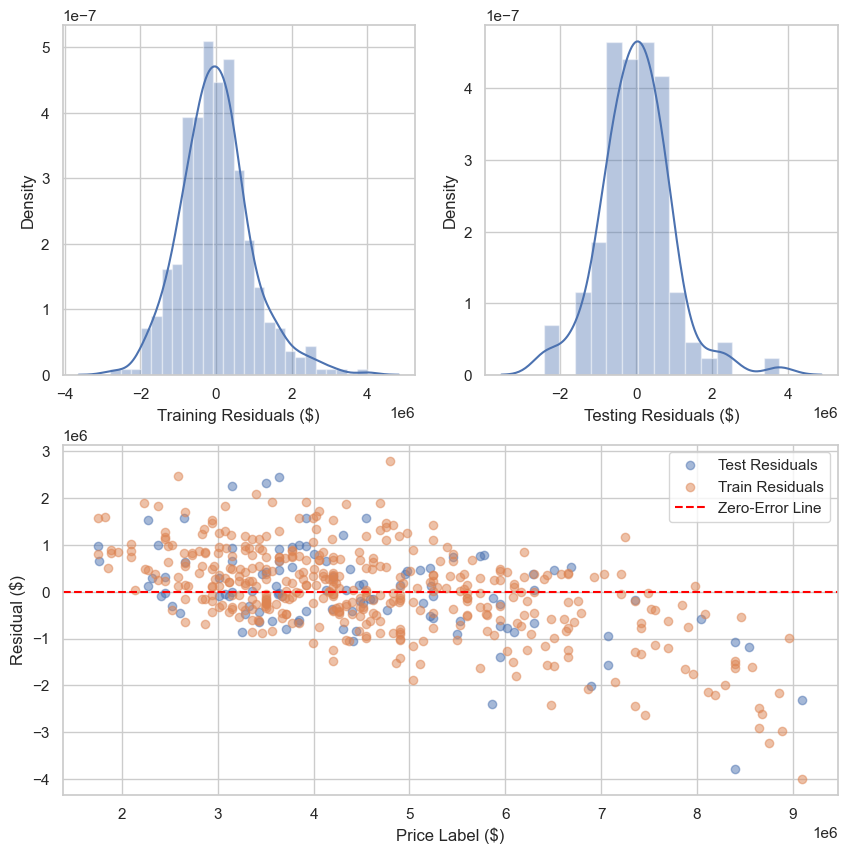


------------- Training Evaluation Metrics -------------

Mean Absolute Error (MAE):     704788.4917429411
Root Mean Squared Error (RMSE): 933052.0408798507
R2 Score:                      0.6609238594230487

-------------- Testing Evaluation Metrics -------------

Mean Absolute Error (MAE):     678986.4644581544
Root Mean Squared Error (RMSE): 933163.884826482
R2 Score:                      0.6388136353177176

----------------- Label vs Prediction -----------------



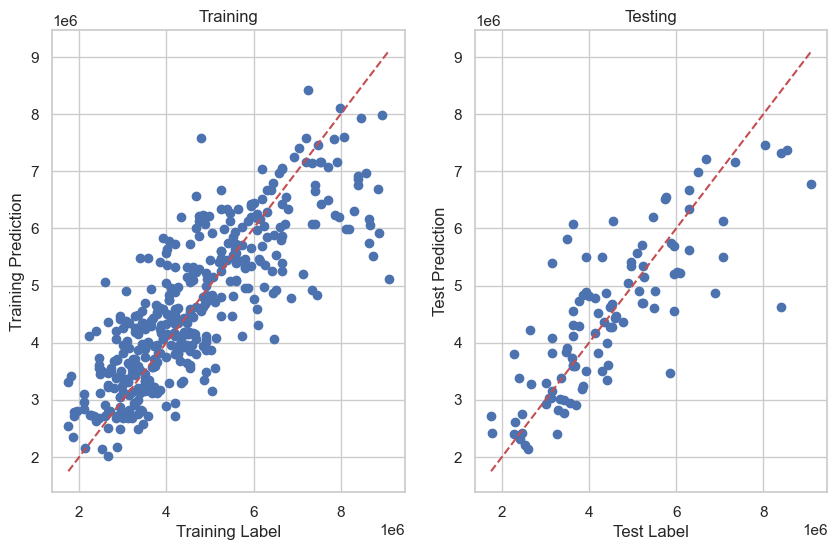

In [16]:
mlr = LinearRegression().fit(x_train, y_train)
train_pred = mlr.predict(x_train)
test_pred = mlr.predict(x_test)
evaluate(mlr, "Multiple Linear Regression", 0, train_pred, test_pred)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
### <center>Ridge Regression</center>
Uses least squares method with the addition of an l2 regularisation term. It applies a penalty term defined by the squared sum of coefficients to the sum of squared errors to reduce overfitting by shrinking all coefficients by the same factor. The specific scikit function being used incorporates cross-validation to evaluate the model.<br/><br/>\
**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

----- Ridge Regression Regression Model Evaluation -----

Coefficients:


array([ 425794.96564851,  351786.51490553,  470709.60570338,
        167579.26171949,  139132.83187946,  217838.91847976,
        172535.29826627,  401907.98735395,  207092.37533069,
       -192554.28076933])

Intercept:


4594101.186440678


------------------ Residual Plots ------------------


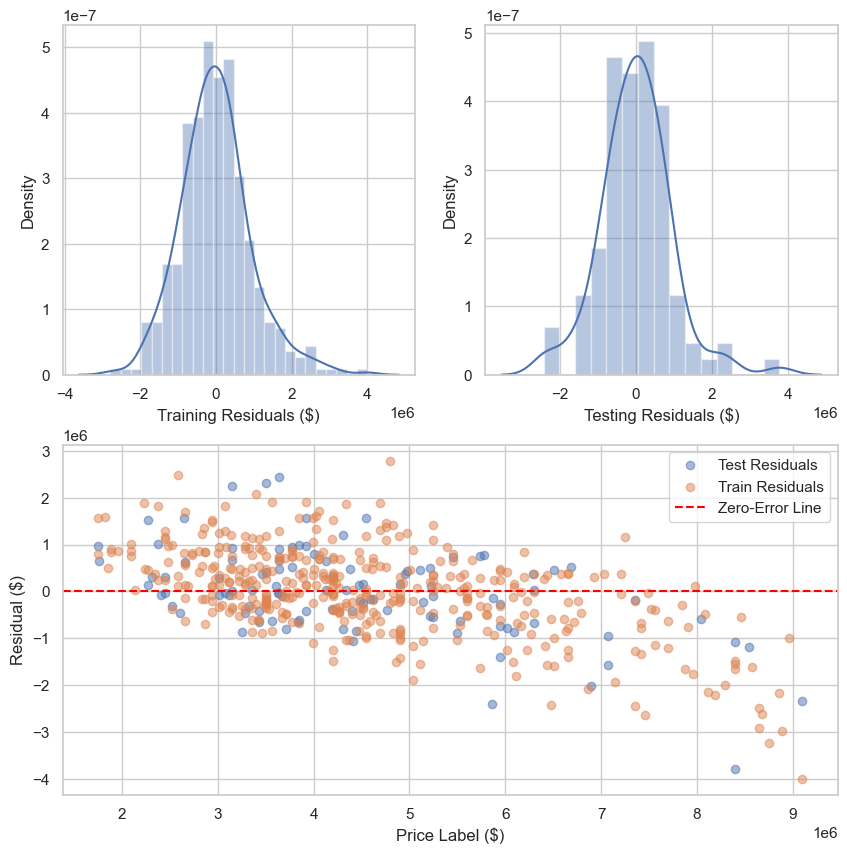


------------- Training Evaluation Metrics -------------

Mean Absolute Error (MAE):     704712.9641816163
Root Mean Squared Error (RMSE): 933053.7127739713
R2 Score:                      0.660922644271291

-------------- Testing Evaluation Metrics -------------

Mean Absolute Error (MAE):     678631.1037572694
Root Mean Squared Error (RMSE): 932920.9196276936
R2 Score:                      0.6390016929439708

----------------- Label vs Prediction -----------------



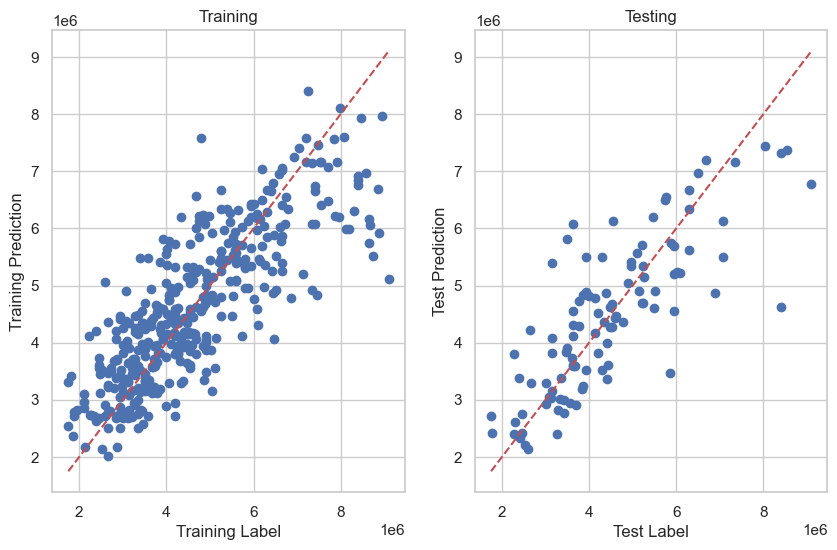

In [17]:
rr = RidgeCV(alphas = (0.1, 0.25, 0.5, 0.75, 0.9, 1.0)).fit(x_train, y_train)
train_pred = rr.predict(x_train)
test_pred = rr.predict(x_test)
evaluate(rr, "Ridge Regression", 1, train_pred, test_pred)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
### <center>Lasso Regression</center>
Uses least squares method with the addition of an l1 regularisation term. It applies a penalty term defined by the sum of the absolute values of the coefficients. This can set some coefficients to zero, effectively performing feature selection. Since this has already been done, there should be no noticable difference between this and the multiple linear regression. The specific scikit function being used incorporates cross-validation to evaluate the model.<br/><br/>\
**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

----- Lasso Regression Regression Model Evaluation -----

Coefficients:


array([ 424989.49130357,  349556.64868944,  465771.25131525,
        163906.95882776,  134994.2028267 ,  211935.95379071,
        164306.37959208,  398021.72235826,  202139.00266716,
       -188558.45356342])

Intercept:


4594101.186440678


------------------ Residual Plots ------------------


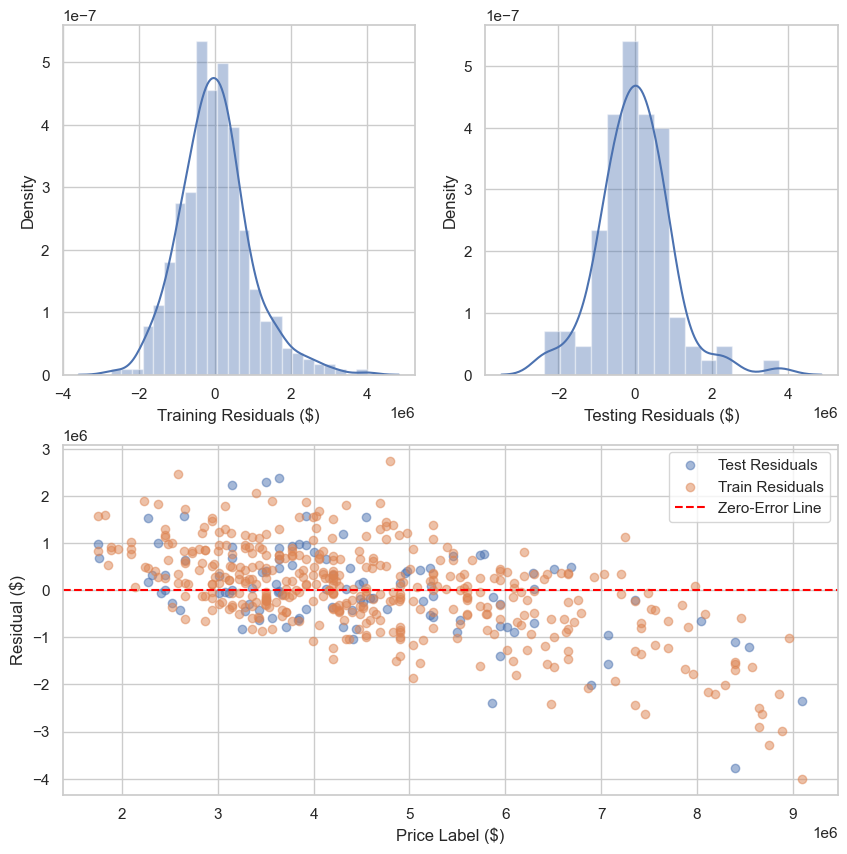


------------- Training Evaluation Metrics -------------

Mean Absolute Error (MAE):     703582.0119892263
Root Mean Squared Error (RMSE): 933247.705124763
R2 Score:                      0.6607816336296248

-------------- Testing Evaluation Metrics -------------

Mean Absolute Error (MAE):     676545.1494438566
Root Mean Squared Error (RMSE): 930984.7123964365
R2 Score:                      0.6404985876766766

----------------- Label vs Prediction -----------------



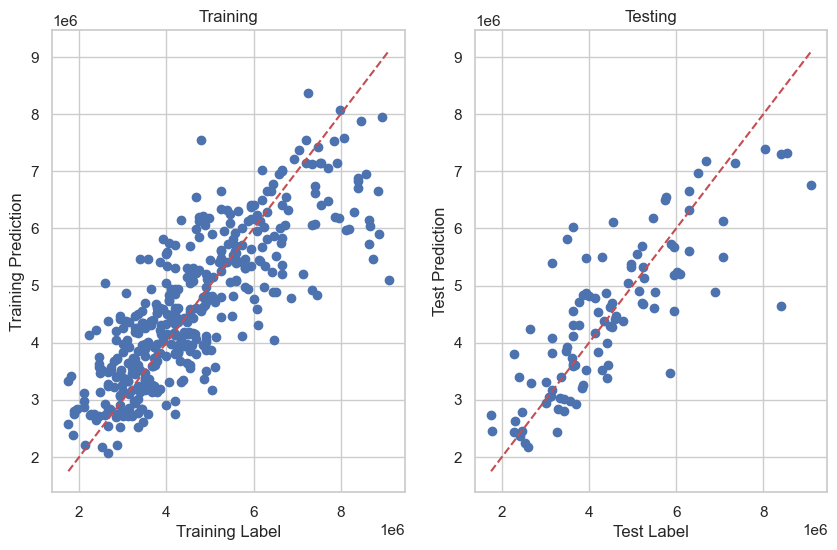

In [18]:
lr = LassoCV(alphas = None, cv = 10, max_iter = 100000).fit(x_train, y_train)
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)
evaluate(lr, "Lasso Regression", 2, train_pred, test_pred)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
### <center>ElasticNet Regression</center>
Uses least squares method with the addition of both l1 and l2 regularisation terms. The specific scikit function being used incorporates cross-validation to evaluate the model.<br/><br/>\
**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

----- ElasticNet Regression Regression Model Evaluation -----

Coefficients:


array([ 425506.6486084 ,  350404.74652403,  467785.72553922,
        165147.07076082,  136378.12183727,  214145.07664251,
        167299.4664624 ,  399509.61571477,  203912.15884402,
       -189981.52903452])

Intercept:


4594101.186440678


------------------ Residual Plots ------------------


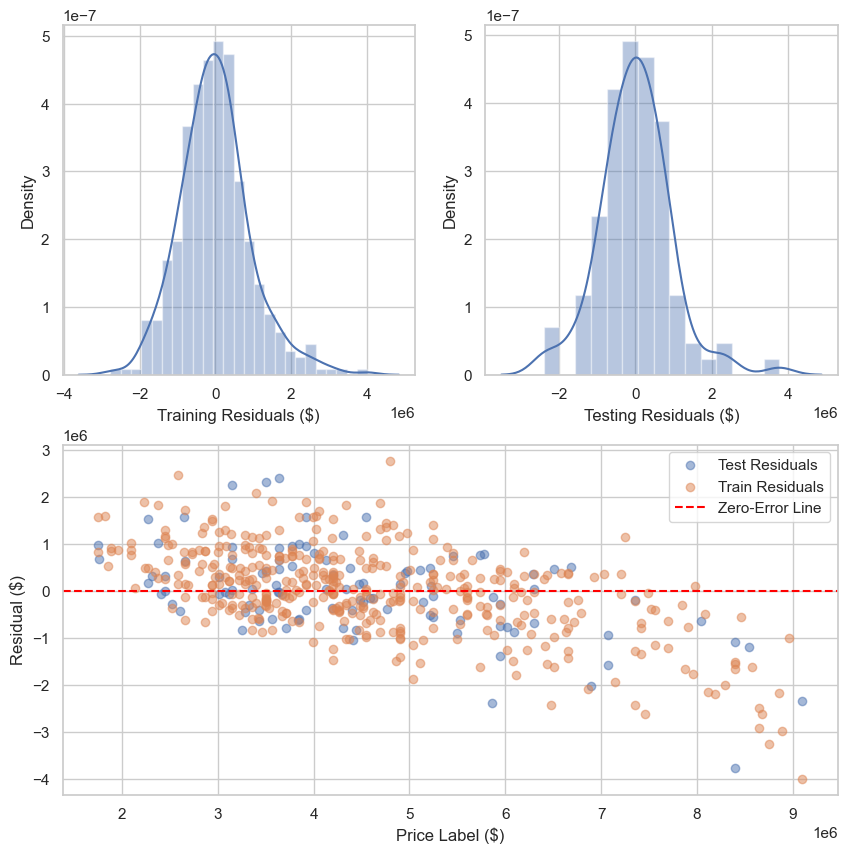


------------- Training Evaluation Metrics -------------

Mean Absolute Error (MAE):     703989.2853382581
Root Mean Squared Error (RMSE): 933136.7313636945
R2 Score:                      0.6608623026729303

-------------- Testing Evaluation Metrics -------------

Mean Absolute Error (MAE):     677317.4289010427
Root Mean Squared Error (RMSE): 931682.5505200514
R2 Score:                      0.6399594428091124

----------------- Label vs Prediction -----------------



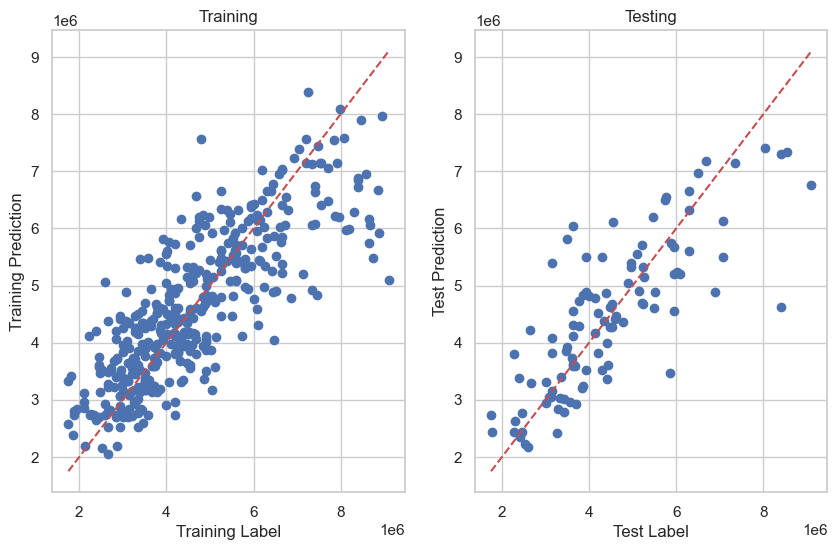

In [19]:
en = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1]).fit(x_train, y_train)
train_pred = en.predict(x_train)
test_pred = en.predict(x_test)
evaluate(en, "ElasticNet Regression", 3, train_pred, test_pred)

,Train-MAE,Test-MAE,Train-RMSE,Test-RMSE,Train-R2,Test-R2
Multiple Linear Regression (MLR),704788.491743,678986.464458,933052.040880,933163.884826,0.660924,0.638814
Ridge Linear Regression (RLR),704712.964182,678631.103757,933053.712774,932920.919628,0.660923,0.639002
Lasso Linear Regression (LLR),703582.011989,676545.149444,933247.705125,930984.712396,0.660782,0.640499
Elastic-Net Regression (ENR),703989.285338,677317.428901,933136.731364,931682.550520,0.660862,0.639959


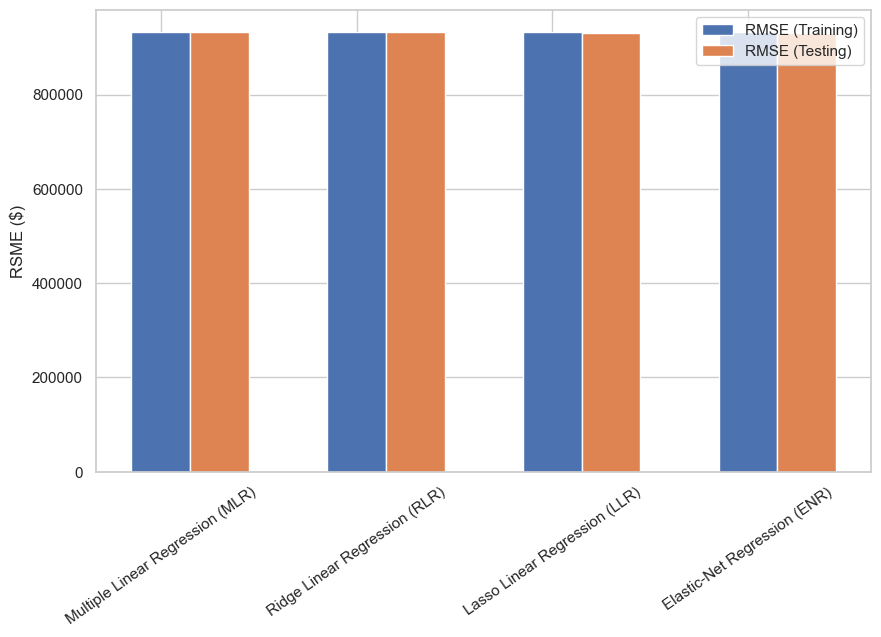

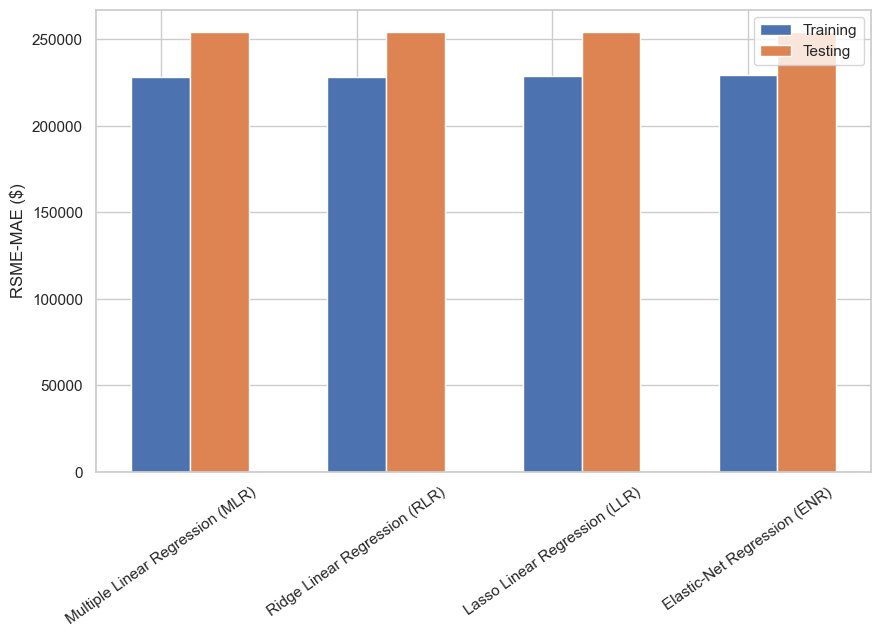

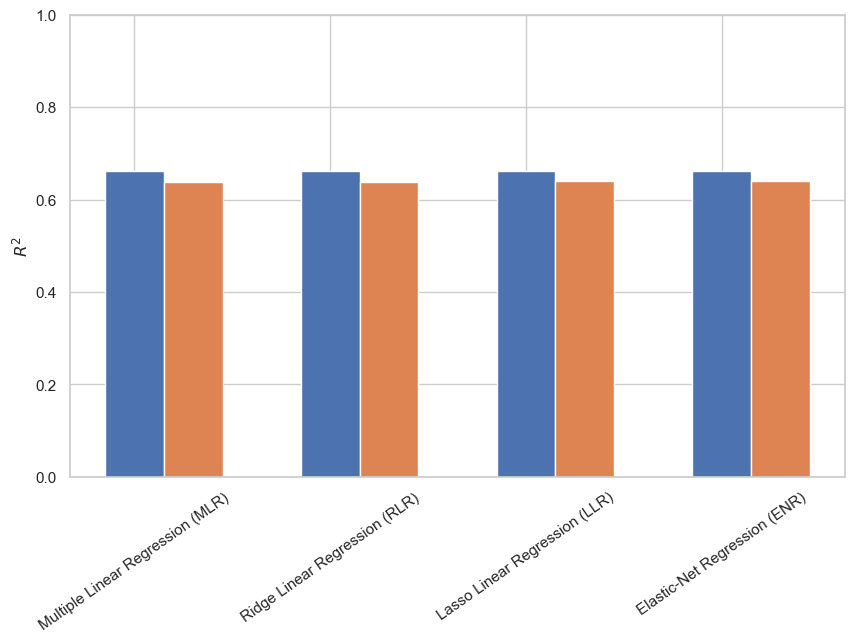

In [20]:
model_comparison.index = ['Multiple Linear Regression (MLR)', 'Ridge Linear Regression (RLR)',
                          'Lasso Linear Regression (LLR)', 'Elastic-Net Regression (ENR)']

display(model_comparison)

plt.bar(np.arange(4), model_comparison["Train-RMSE"].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(4)+0.3, model_comparison["Test-RMSE"].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(4), model_comparison.index, rotation =35)
plt.ylabel("RSME ($)")
plt.legend()

# RMSE - MAE: Shows effect of outliers
plt.figure()
plt.bar(np.arange(4), round((model_comparison["Train-RMSE"]-model_comparison["Train-MAE"]).sort_values(ascending=True),4), width=0.3, label="Training")
plt.bar(np.arange(4)+0.3, round((model_comparison["Test-RMSE"]-model_comparison["Test-MAE"]).sort_values(ascending=True),4), width=0.3, label="Testing")
plt.xticks(np.arange(4), model_comparison.index, rotation =35)
plt.ylabel("RSME-MAE ($)")
plt.legend()

plt.figure()
plt.bar(np.arange(4), round((model_comparison["Train-R2"]).sort_values(ascending=True),4), width=0.3)
plt.bar(np.arange(4)+0.3, round((model_comparison["Test-R2"]).sort_values(ascending=True),4), width=0.3)
plt.xticks(np.arange(4), model_comparison.index, rotation =35)
plt.ylabel("$R^{2}$")
plt.ylim([0,1])
plt.show()

**Data Summaries**
1. Each model performs similarly in each metric
2. RMSE values are smaller than the standard deviation of price (\\$1.87 Million std vs ~\\$1.1 Million RSME) showing the model is explaining some of the variance.
3. RSME values are larger than MAE values indicating significant outliers within the dataset that are affecting the models.
4. $R^{2}$ values have a difference of ~0.02 between datasets for each model indicating that they are generalising to unseen data well.
5. Residuals plot shows that the models are undervaluing expensive houses and overvaluing cheaper houses.
6. Errors distributions are Gaussian indicating that the model is well-fitted and homoscedastic. This means I can calculate p-values to test whether the predictions are statistically significant.

In [21]:
end_time = time.time()
print(f"Total Time Elapsed: {end_time - start_time:.2f}")

Total Time Elapsed: 49.63


## Conclusions
1. Dataset was too small for more accurate predictions, with the original 545 samples being reduced by 5.14% after removing outliers.
2. Due to high multicollinearity between features, RFE feature elimination was necessary.
3. Each model performed very similarly due to utilising cross-validation within the training processes. The conclusions from the data show that while each model generalises well and explain some of the variance, they undervalue cheaper houses and overvalue more expensive houses. This could indicate that more features may be needed in the dataset, data imbalance, or the models are unable to capture more complex relationships.

## Future Work
Since there is no supplimentary data to improve the models, most potential work will be aimed around performing more statistical tests and trying other methods for feature scaling, elimination, etc. 